In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_excel('/content/python.xlsx')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,X9283,Sales,Quantity,Discount,Returned,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,731.94,3.0,0.0,0.0,NaN,NaN,NaN,NaN
2,CA-2017-138688,42898.0,42902.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,0.0,NaN,NaN,NaN,NaN,NaN
4,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,0.0,NaN,NaN,NaN,NaN,NaN


In [81]:
df.shape

(10797, 25)

### Duplicated Data Treatment

In [82]:
#Checking Duplicated Data

df.duplicated().sum()

804

In [83]:
#Removing Duplicated Data

df.drop_duplicates(inplace=True)

In [84]:
#Checking Duplicated Data again

df.duplicated().sum()

0

### Column Treatment

In [85]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'X9281', 'X9282', 'X9283', 'Sales', 'Quantity',
       'Discount', 'Returned', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

there are 5 columns that should be dropped

In [86]:
df.drop(df.columns[-5:], axis=1, inplace=True)

In [87]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'X9281', 'X9282', 'X9283', 'Sales', 'Quantity',
       'Discount', 'Returned'],
      dtype='object')

In [88]:
#Formatting columns into snake case

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'x9281', 'x9282', 'x9283', 'sales', 'quantity',
       'discount', 'returned'],
      dtype='object')

In [89]:
#rename columns

df.rename(columns={'x9281': 'category', 'x9282': 'sub_category', 'x9283': 'product_name'}, inplace=True)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,returned
0,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,0.0
1,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,731.94,3.0,0.0
2,CA-2017-138688,42898.0,42902.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,0.0
3,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,0.0
4,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,0.0


In [90]:
# since all rows of order_date and ship_date are anomaly, they can't be used, so they should be dropped

df.drop(['order_date', 'ship_date'], axis=1, inplace=True)

In [91]:
df.head()

,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,returned
0,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.0,0.0
1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,731.94,3.0,0.0
2,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.0,0.0
3,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,0.0
4,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,0.0


### Missing values Treatment

In [92]:
#checking missing values

df.isnull().sum()

order_id           0
ship_mode        817
customer_id      817
customer_name    817
segment          817
country          817
city             817
state            817
postal_code      828
region           817
product_id       817
category         817
sub_category     817
product_name     817
sales            817
quantity         824
discount         817
returned         817
dtype: int64

In [93]:
#drop missing values

df.dropna(inplace=True)

In [94]:
df.isnull().sum()

order_id         0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
returned         0
dtype: int64

### Adding net income column

In [95]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9158 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9158 non-null   object 
 1   ship_mode      9158 non-null   object 
 2   customer_id    9158 non-null   object 
 3   customer_name  9158 non-null   object 
 4   segment        9158 non-null   object 
 5   country        9158 non-null   object 
 6   city           9158 non-null   object 
 7   state          9158 non-null   object 
 8   postal_code    9158 non-null   float64
 9   region         9158 non-null   object 
 10  product_id     9158 non-null   object 
 11  category       9158 non-null   object 
 12  sub_category   9158 non-null   object 
 13  product_name   9158 non-null   object 
 14  sales          9158 non-null   object 
 15  quantity       9158 non-null   object 
 16  discount       9158 non-null   object 
 17  returned       9158 non-null   object 
dtypes: float

In [96]:
#convert sales, quantity, and discount to numeric and turn anomaly values to null

for cols in ['sales', 'quantity', 'discount']:
  df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [97]:
#calculate net income

df['net_income'] = df.sales - (df.sales*df.discount)
df

,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,returned,net_income
0,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.00,0.00,0.0,261.960000
1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,NaN,731.94,3.00,0.0,NaN
2,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.00,0.00,0.0,14.620000
3,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.00,0.45,0.0,526.667625
4,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.00,0.20,0.0,17.894400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2018-163629,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5.00,0.00,1.0,206.100000
9989,CA-2015-110422,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.00,0.20,0.0,20.198400
9990,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.00,0.00,0.0,91.960000
9991,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.00,0.20,0.0,206.860800


### Visualizing dynamic of net income in south region

In [98]:
df_reg = df.groupby('region')['net_income'].sum()
df_reg

region
Central    329693.958580
East       406555.128800
South      249745.451375
West       496832.157700
Name: net_income, dtype: float64

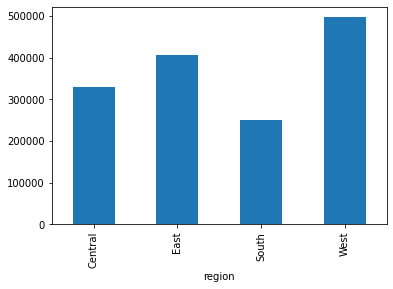

In [99]:
df_reg.plot(kind='bar')

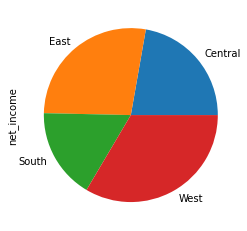

In [100]:
df_reg.plot(kind='pie')

from the chart above we know that south region has the smallest net income among 4 regions

#### Deep dive into South Region

In [102]:
df_south = df[df.region == 'South']
df_south.head()

,order_id,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,returned,net_income
0,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.00,0.00,0.0,261.960000
1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,NaN,731.94,3.00,0.0,NaN
3,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.00,0.45,0.0,526.667625
4,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.00,0.20,0.0,17.894400
12,CA-2018-114412,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3.00,0.20,0.0,12.441600


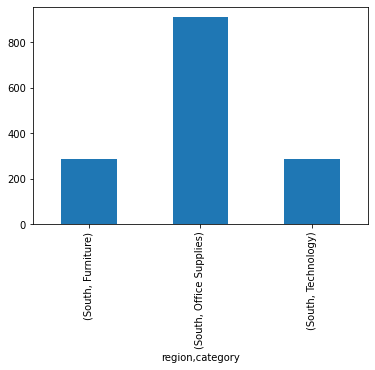

In [107]:
df_south.groupby(['region', 'category'])['category'].count().plot(kind='bar')

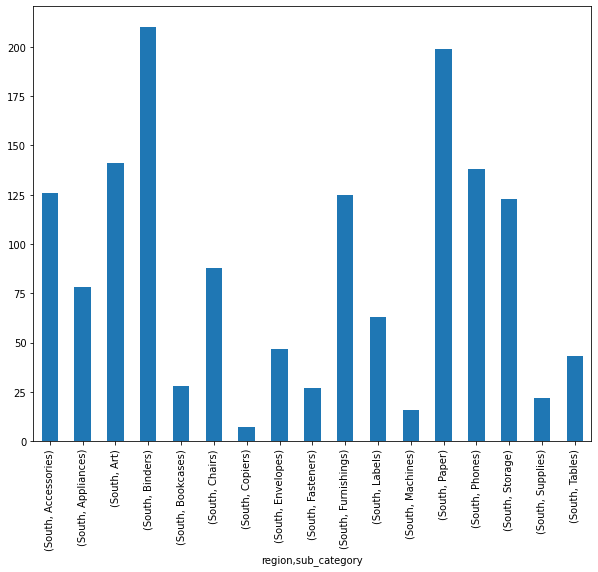

In [114]:
plt.figure(figsize=(10,8))
df_south.groupby(['region', 'sub_category'])['sub_category'].count().plot(kind='bar')

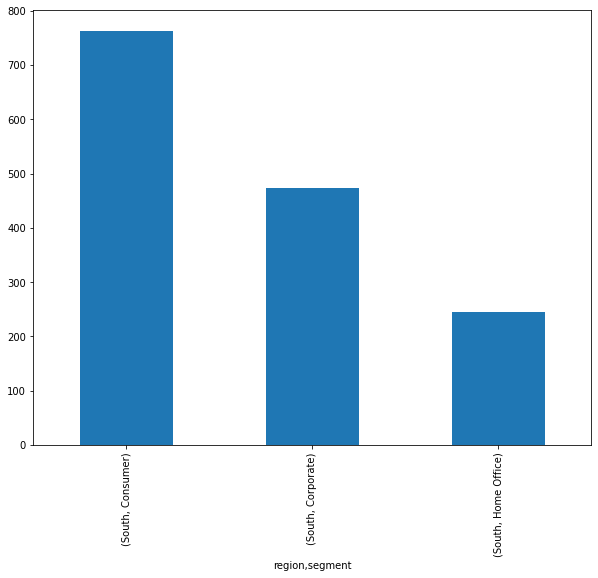

In [115]:
plt.figure(figsize=(10,8))
df_south.groupby(['region', 'segment'])['segment'].count().plot(kind='bar')

from 3 charts above, we are able to know that Shout Region has strong market in Consumer segment with the most sold category and sub-category are supplies and binders, respectively.